### Convolutional Neural Networks based on Cat Dog Classification:-

### **Aim:-**

1.  The main aim of this project is to predict whether the given image is of Cat or Dog using CNN Model.


### **Steps used in this Algorithm:-**

1.  Import all the necessary libraries

2.  Load the dataset

3.  Check the shape of the data

4.  Perform the Data preprocessing

5.  Check the entire training and testing data

6.  Check and Visualize the sample image

7.  Build the entire CNN Model

8.  Compile the CNN Model

9.  Get the summary of the model

10.  Train the CNN Model

11.  Evaluate the CNN Model

12.  Making predictions

13.  Plot Accuracy & Loss Graph

14.  Visualize predictions

### Step 1:  Import all the necessary libraries

In [37]:
import  numpy             as    np
import  pandas            as    pd
import  matplotlib.pyplot as    plt
import  seaborn           as    sns

import  tensorflow        as    tf

from    tensorflow.keras.models    import    Sequential
from    tensorflow.keras.layers    import    Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D,Flatten
from    tensorflow.keras.utils     import    to_categorical

###**OBSERVATIONS:**

1.   numpy ------------>  Calculation of the numerical array

2.   pandas ----------->  Data Creation and Manipulation

3.   matplotlib ------->  Data Visualization

4.   seaborn   -------->  Data Correlation

5.   tensorflow ------->  Deep Learning Framework

6.   Sequential ------->  Linear stack of layers

7.   Dense ------------>  Fully connected dense neural network

8.  Dropout ----------->  Reduce overfitting

9.  BatchNormalization ----->  Normalizes the activation of the neurons to speed up convergence

10.  Conv2D ------------>  Creates a convolutional layer that has the feature maps

11.  MaxPooling2D -------->  Reduces the size of the input feature maps

12.  to_categorical ------->  Converts the number into one hot encoded form.

### Step 2: Load the dataset

**Input Data:**

In [38]:
### Load the input data

X_train = pd.read_csv('/content/input.csv')

X_test  = pd.read_csv('/content/input_test.csv')

In [39]:
X_train

,3.700000000000000000e+01,3.900000000000000000e+01,2.500000000000000000e+01,2.600000000000000000e+01,2.400000000000000000e+01,9.000000000000000000e+00,3.400000000000000000e+01,2.500000000000000000e+01.1,1.000000000000000000e+01,4.900000000000000000e+01,...,2.100000000000000000e+01.135,6.700000000000000000e+01.232,6.300000000000000000e+01.242,3.800000000000000000e+01.309,7.800000000000000000e+01.179,7.400000000000000000e+01.218,4.900000000000000000e+01.302,5.800000000000000000e+01.260,5.400000000000000000e+01.266,2.900000000000000000e+01.298
0,131.0,128.0,135.0,160.0,157.0,164.0,198.0,192.0,204.0,204.0,...,65.0,63.0,91.0,69.0,62.0,87.0,65.0,71.0,96.0,74.0
1,80.0,92.0,88.0,83.0,96.0,89.0,76.0,92.0,82.0,74.0,...,99.0,133.0,128.0,109.0,119.0,114.0,94.0,124.0,119.0,99.0
2,149.0,173.0,151.0,131.0,153.0,132.0,156.0,173.0,155.0,143.0,...,57.0,48.0,48.0,58.0,51.0,51.0,61.0,56.0,56.0,66.0
3,255.0,254.0,239.0,253.0,246.0,228.0,255.0,252.0,233.0,254.0,...,234.0,255.0,254.0,234.0,255.0,254.0,234.0,254.0,253.0,233.0
4,111.0,117.0,117.0,107.0,113.0,113.0,111.0,117.0,117.0,122.0,...,135.0,164.0,168.0,179.0,147.0,147.0,157.0,100.0,100.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,117.0,109.0,107.0,116.0,108.0,106.0,107.0,102.0,99.0,98.0,...,55.0,42.0,42.0,54.0,43.0,43.0,53.0,44.0,44.0,54.0
1995,167.0,156.0,136.0,157.0,146.0,126.0,154.0,143.0,123.0,161.0,...,37.0,145.0,76.0,37.0,145.0,76.0,37.0,145.0,76.0,37.0
1996,231.0,226.0,230.0,239.0,235.0,236.0,243.0,239.0,238.0,247.0,...,84.0,74.0,77.0,84.0,68.0,71.0,78.0,62.0,65.0,72.0
1997,61.0,61.0,63.0,24.0,23.0,28.0,25.0,25.0,33.0,19.0,...,170.0,149.0,135.0,135.0,123.0,111.0,111.0,135.0,123.0,123.0


In [40]:
X_test

,1.180000000000000000e+02,8.200000000000000000e+01,9.600000000000000000e+01,1.090000000000000000e+02,7.100000000000000000e+01,8.200000000000000000e+01.1,1.160000000000000000e+02,7.700000000000000000e+01,7.800000000000000000e+01,1.110000000000000000e+02,...,3.700000000000000000e+01.20,1.230000000000000000e+02.78,7.300000000000000000e+01.49,4.000000000000000000e+01.28,1.390000000000000000e+02.108,8.200000000000000000e+01.66,2.900000000000000000e+01.21,1.400000000000000000e+02.109,7.900000000000000000e+01.49,1.600000000000000000e+01.30
0,223.0,211.0,163.0,223.0,209.0,160.0,244.0,228.0,179.0,226.0,...,65.0,69.0,73.0,76.0,69.0,72.0,77.0,70.0,73.0,78.0
1,73.0,67.0,43.0,75.0,69.0,45.0,79.0,71.0,50.0,80.0,...,168.0,224.0,213.0,167.0,223.0,212.0,166.0,222.0,211.0,165.0
2,0.0,3.0,1.0,18.0,24.0,22.0,34.0,40.0,38.0,0.0,...,13.0,6.0,6.0,8.0,6.0,7.0,9.0,10.0,11.0,13.0
3,27.0,55.0,76.0,73.0,105.0,126.0,115.0,151.0,175.0,105.0,...,151.0,178.0,164.0,163.0,193.0,175.0,171.0,183.0,164.0,158.0
4,121.0,122.0,114.0,96.0,102.0,90.0,51.0,64.0,47.0,149.0,...,39.0,126.0,143.0,73.0,107.0,127.0,58.0,77.0,97.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,244.0,224.0,187.0,246.0,226.0,189.0,242.0,222.0,185.0,245.0,...,48.0,53.0,43.0,51.0,52.0,42.0,50.0,50.0,40.0,48.0
395,213.0,213.0,201.0,212.0,212.0,200.0,211.0,213.0,199.0,214.0,...,210.0,217.0,209.0,207.0,214.0,206.0,204.0,214.0,206.0,204.0
396,249.0,245.0,242.0,238.0,237.0,233.0,97.0,96.0,92.0,131.0,...,85.0,105.0,104.0,100.0,111.0,110.0,106.0,73.0,72.0,68.0
397,97.0,96.0,102.0,104.0,103.0,109.0,99.0,98.0,104.0,103.0,...,83.0,88.0,82.0,84.0,87.0,81.0,83.0,84.0,78.0,80.0


In [41]:
### Check the datatype of the input

print("Type of the input training data is:", type(X_train))

print("Type of the input testing  data is:", type(X_test))

Type of the input training data is: <class 'pandas.core.frame.DataFrame'>
Type of the input testing  data is: <class 'pandas.core.frame.DataFrame'>


### **OBSERVATIONS:**

1. Here both the input training and testing data are of the type DataFrame. But CNN Model cannot work with DataFrame, it can only work with numpy array.

2. So we need to convert the DataFrame into numpy array, so that when it is passed as an input into the CNN Model, CNN Model can easily work with it.

In [42]:
### Convert the DataFrame into numpy array

X_train = X_train.values

X_test  = X_test.values

In [43]:
X_train

array([[131., 128., 135., ...,  71.,  96.,  74.],
       [ 80.,  92.,  88., ..., 124., 119.,  99.],
       [149., 173., 151., ...,  56.,  56.,  66.],
       ...,
       [231., 226., 230., ...,  62.,  65.,  72.],
       [ 61.,  61.,  63., ..., 135., 123., 123.],
       [ 64.,  31.,  12., ...,  61.,  49.,  35.]])

In [44]:
X_test

array([[223., 211., 163., ...,  70.,  73.,  78.],
       [ 73.,  67.,  43., ..., 222., 211., 165.],
       [  0.,   3.,   1., ...,  10.,  11.,  13.],
       ...,
       [249., 245., 242., ...,  73.,  72.,  68.],
       [ 97.,  96., 102., ...,  84.,  78.,  80.],
       [ 94.,  66.,  63., ..., 119.,  96.,  80.]])

###**OBSERVATIONS:**

1. The input training and testing data has now been converted in the form of numpy array.

2. Now this input can easily work with the CNN Model.

###**Output Data:**



In [45]:
### Output Data

Y_train = pd.read_csv('/content/labels.csv')


Y_test = pd.read_csv('/content/labels_test.csv')

In [46]:
Y_train

,0
0,0
1,0
2,0
3,0
4,0
...,...
1994,1
1995,1
1996,1
1997,1


In [47]:
Y_test

,0
0,0
1,0
2,0
3,0
4,0
...,...
394,1
395,1
396,1
397,1


In [48]:
### Check the datatype of the input

print("Type of the output training data is:", type(Y_train))

print("Type of the output testing  data is:", type(Y_test))

Type of the output training data is: <class 'pandas.core.frame.DataFrame'>
Type of the output testing  data is: <class 'pandas.core.frame.DataFrame'>


###**OBSERVATIONS:**

1.  The output training and testing data is in DataFrame. It cannot be passed as an input into the CNN Model as the CNN Model can only work with the numpy array.

2. We need to convert the output training and testing data of DataFrame into the numpy array

In [49]:
Y_train = Y_train.values

Y_test  = Y_test.values

In [50]:
Y_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [51]:
Y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

### **OBSERVATIONS:**

1.  Now the output training and testing data has been converted into the numpy array.

2. This numpy array data can easily be fed as an input into the CNN Model and the model can work with it easily.

### Step 3: Check the shape of the data

###**Input Data**

In [52]:
### Input Data

print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing data is:",  X_test.shape)

Shape of the input training data is: (1999, 30000)
Shape of the input testing data is: (399, 30000)


###**Output Data**

In [53]:
### Output Data

print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing data is:",  Y_test.shape)

Shape of the output training data is: (1999, 1)
Shape of the output testing data is: (399, 1)


###**OBSERVATIONS:**

1.  The original input and output data has the data in the form
(Total number of images, No of features processed per image).

2.  We need to reshape the input and the output data because the CNN Model can work with
(batch_size, height, width, no of channels).

In [54]:
### Reshape the input data

X_train = X_train.reshape(len(X_train),100,100,3)

X_test  = X_test.reshape(len(X_test),100,100,3)

In [55]:
### Input Data

print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing data is:",  X_test.shape)

Shape of the input training data is: (1999, 100, 100, 3)
Shape of the input testing data is: (399, 100, 100, 3)


###**OBSERVATIONS:**

1.  Now after reshaping the inputs , all the inputs are now in the form

(batch_size, height, width, number of channels)



2. This input size can be easily fit into the CNN Model and the CNN Model can work with it easily.

In [56]:
### Reshape the output data

Y_train = Y_train.reshape(len(Y_train),1)

Y_test  = Y_test.reshape(len(Y_test),1)

In [57]:
Y_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [58]:
Y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

###**OBSERVATIONS:**

1.  The output training and the testing data has been reshaped to 1 without including any height and width

2.  This is because the output is actually a number. It is not an image.

In [59]:
### Input Data

print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing data is:",  Y_test.shape)

Shape of the output training data is: (1999, 1)
Shape of the output testing data is: (399, 1)


### Step 4: Perform the Data preprocessing

In [60]:
### Normalize the pixel values

X_train = X_train/255.0

X_test  = X_test/255.0

###**OBSERVATIONS:**

(a.) Normalization is needed to scale all the pixel values from 0 to 255 to 0 to 1  , so that the convergence speed can improve easily and can reach to the global minima.

(b.) Prevents having large activation functions and thus it prevents having an unstable model training.

(c.) Improves the speed , performance and the accuarcy of the model.

### Step 5: Check the entire training and testing data

In [61]:
X_train

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

In [62]:
X_test

array([[[[0.8745098 , 0.82745098, 0.63921569],
         [0.8745098 , 0.81960784, 0.62745098],
         [0.95686275, 0.89411765, 0.70196078],
         ...,
         [0.98823529, 0.99215686, 1.        ],
         [0.99607843, 1.        , 1.        ],
         [0.96078431, 0.96470588, 0.98039216]],

        [[1.        , 0.96470588, 0.80784314],
         [0.99607843, 0.94509804, 0.78039216],
         [1.        , 0.98431373, 0.80784314],
         ...,
         [0.98823529, 0.98823529, 0.98039216],
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686]],

        [[1.        , 0.97647059, 0.87058824],
         [0.99607843, 0.95294118, 0.83529412],
         [1.        , 0.96470588, 0.83137255],
         ...,
         [0.94509804, 0.9372549 , 0.89019608],
         [0.64705882, 0.63921569, 0.59215686],
         [0.56862745, 0.56078431, 0.51372549]],

        ...,

        [[0.53333333, 0.51372549, 0.50196078],
         [0.68235294, 0.66666667, 0.65490196]

In [63]:
Y_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [64]:
Y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

###**OBSERVATIONS:**

1. We have the entire input training and testing data that is of the form 3*3 form.

2. The output is in 1-D vector form.

### Step 6: Check and Visualize the sample image

999


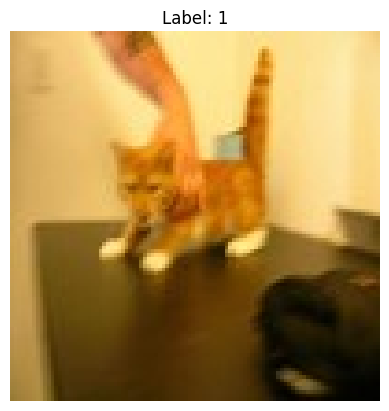

In [65]:
import random

### Generates any random integer within a range
idx = random.randint(0, len(X_train)-1)

print(idx)

### Display the image for the training data  at that particular pixel

plt.imshow(X_train[idx])

### Get the title of the image
plt.title("Label: " + str(Y_train[idx][0]))

plt.axis('off')

### Display the image
plt.show()

###**OBSERVATIONS:**


1.  We generate a random integer index within the range of the training dataset using random.randint(0, len(X_train)-1).

2.  Using that randomly selected index, we retrieve and plot the corresponding image (for example, a cat) from X_train to visualize a random training sample


### Step 7: Build the entire CNN Model

In [66]:
### Built the entire CNN Model

model = Sequential([
    ### Create the first layer of Convolution
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding = 'same', input_shape=(100,100,3))                    ,
    BatchNormalization()                                                                                 ,
    MaxPooling2D(pool_size=(2,2))                                                                        ,
    Dropout(0.25)                                                                                        ,

    ### Create the second layer of Convolution
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same')                                             ,
    BatchNormalization()                                                                                 ,
    MaxPooling2D(pool_size=(2,2))                                                                        ,
    Dropout(0.25)                                                                                        ,


    ### Create the third layer of Convolution
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding = 'same')                                            ,
    BatchNormalization()                                                                                 ,
    MaxPooling2D(pool_size=(2,2))                                                                        ,
    Dropout(0.25)                                                                                        ,

    ### Convert the 3D feature maps into 1D vector
    Flatten()                                                                                            ,

    ### Make a fully dense connected neural netwoirk
    Dense(128, activation='relu')                                                                        ,
    Dropout(0.25)                                                                                        ,

    # Output Layer (Binary Classification)
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **OBSERVATIONS**:

1.  A fully dense CNN Model is prepared.

2.  First layer of Convolutional Block is made

(a.) The input shape of the image used in this layer is 32 * 32 * 3 (32 *32 pixels with 3 channels) (RGB).

(b.) 32 feature maps are formed. Each feature maps is of the size 3 * 3

(c.) Relu activation function is applied on it to increase the non-linearity of the image.

(d.) padding = 'same'. It is done to keep all the input feature maps in one same size range.

(e.) BatchNormalization is applied so as to normalize all the activations of the layer to make the training stable and accurate and even make the convergence faster.

(f.) MaxPooling is done soas to reduce the size of the input feature maps size to more reduced form.

(g.) Dropout is done in this layer to prevent overfitting.



3.  Second layer of Convolutional Block is made

(a.) 64 feature maps are formed. Each feature maps is of the size 3 * 3

(b.) Relu activation function is applied on it to increase the non-linearity of the image.

(c.) padding = 'same'. It is done to keep all the input feature maps in one same size range.

(d.) BatchNormalization is applied so as to normalize all the activations of the layer to make the training stable and accurate and even make the convergence faster.

(e.) MaxPooling is done so as to reduce the size of the input feature maps size to more reduced form.

(f.) Dropout is done in this layer to prevent overfitting.




4.  Third layer of Convolutional Block is made

(a.) 128 feature maps are formed. Each feature maps is of the size 3 * 3

(b.) Relu activation function is applied on it to increase the non-linearity of the image.

(c.) padding = 'same'. It is done to keep all the input feature maps in one same size range.

(d.) BatchNormalization is applied so as to normalize all the activations of the layer to make the training stable and accurate and even make the convergence faster.

(e.) MaxPooling is done soas to reduce the size of the input feature maps size to more reduced form.

(f.) Dropout is done in this layer to prevent overfitting.

5.  The 3D feature maps are flattened and converted into 1D row vector.

6.  Then the 1D vector becomes the input for the ANN Model.

7.   A fully dense connected layer is formed with 128 neurons and relu activation function is applied on it to increase the non-linearity of the image.

8.  Dropout function is applied to reduce the overfitting.

9.   Then the final output layer is constructed with 1 layers and the sigmoid activation function applied on it to predict the image is cat or dog.

### Step 8: Compile the CNN Model

In [67]:
### compile the model for training

model.compile(
    optimizer = 'adam'              ,
    loss      = 'binary_crossentropy',
    metrics   = ['accuracy']
)

###**OBSERVATIONS:**

1.  The CNN Model has been made ready for the training with the help of follwoing parameters:-

  (a.)  optimizers = 'adam'. It is Adaptive optimizer

       It is used to update and optimize the weights during the model training.


  (b.)  loss = 'binary_crossentropy'.

      It is the loss function that is used to solve binary classification problem.


   (c.) metrics = ['accuracy']

     It is used to evaluate the performance of the model.

### Step 9: Get the summary of the model

In [68]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,453,697 (9.36 MB)

 Trainable params: 2,453,249 (9.36 MB)

 Non-trainable params: 448 (1.75 KB)

OBSERVATIONS:


1.  It depicts about the

(a.) Number of parameters

(b.) Layer shapes

(c.) Trainable parameters

### Step 10: Train the CNN Model

In [69]:
### Train the CNN Model

history = model.fit(
    X_train                                       ,
    Y_train                                       ,
    epochs   =  10                                ,
    batch_size = 32                               ,
    validation_data = (X_test, Y_test)            ,
    validation_split = 0.2                        ,
    verbose          = 1
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.5608 - loss: 3.4445 - val_accuracy: 0.5013 - val_loss: 6.3255
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6473 - loss: 0.6292 - val_accuracy: 0.5013 - val_loss: 5.3177
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.7081 - loss: 0.5774 - val_accuracy: 0.5013 - val_loss: 3.1735
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7335 - loss: 0.5136 - val_accuracy: 0.5013 - val_loss: 3.3052
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7413 - loss: 0.4990 - val_accuracy: 0.5990 - val_loss: 0.8197
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7881 - loss: 0.4419 - val_accuracy: 0.5714 - val_loss: 0.9396
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8011 - loss: 0.4056 - val_accuracy: 0.5338 - val_loss: 1.4555
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8406 - loss: 0.3351 - val_accuracy: 0.6216 - val_los

### **OBSERVATIONS:**

1.  The CNN Model is trained with the help of the following parameters:-

    (a.)  X_train, Y_train ------>   Training data

    (b.)  epochs = 10      ------>  10 iterations is needed to train the model

    (c.)  batch_size = 32  ------>  after every 32 samples , the weight get updated.

    (d.)  validation_data   ------> Test data neede to train the model

    (e.)   validation_split ------> 20 % of the data is needed for validation

    (f.)   verbose -------------> Amount of the data printed during the model training

2. After the model training, the accuracy of the model has increased but the loss function has reduced. So the model is working fine.


### Step 11: Evaluate the CNN Model

In [70]:
loss, acc = model.evaluate(X_test, Y_test)

print("Test Loss:"      ,  loss)
print("Test Accuracy:"  ,  acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.8020 - loss: 0.4887
Test Loss: 0.922305166721344
Test Accuracy: 0.6190476417541504


### **OBSERVATIONS:**

1. After evaluating the model using the test data, the test accuracy is 73.43. The test accuracy of the model is high . So the model is completely fine.

### Step 12: Making predictions

In [71]:
### predict the model

Y_pred_prob = model.predict(X_test)

print(Y_pred_prob)   ### It contains the probabilities of all the output classes

### Convert all the probabilities into 0 or 1

predicted_classes = (Y_pred_prob > 0.5).astype(int)

print(predicted_classes)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step
[[1.43694654e-01]
 [4.51676920e-02]
 [1.92452744e-01]
 [4.69591701e-03]
 [2.82943458e-03]
 [1.50601447e-01]
 [2.24356200e-09]
 [8.03241014e-01]
 [4.77758199e-02]
 [2.06378773e-02]
 [3.96278240e-02]
 [1.69568300e-01]
 [1.80016421e-02]
 [3.78491282e-01]
 [9.11909401e-01]
 [1.39032153e-03]
 [1.33951870e-03]
 [5.97524792e-02]
 [5.00689626e-01]
 [1.53290457e-03]
 [1.33511113e-08]
 [1.21385278e-06]
 [2.18420494e-02]
 [6.33437186e-02]
 [4.53624725e-02]
 [2.82185942e-01]
 [7.01934770e-02]
 [3.67950089e-02]
 [6.39383565e-04]
 [9.38287296e-04]
 [2.30589196e-01]
 [4.26796436e-01]
 [3.39149475e-01]
 [3.31781685e-01]
 [3.45135108e-02]
 [1.25758657e-02]
 [2.35791743e-01]
 [1.67166200e-02]
 [6.67876884e-05]
 [2.79724777e-01]
 [4.24761981e-01]
 [1.39721697e-02]
 [1.90142216e-03]
 [1.59033090e-01]
 [1.37230322e-01]
 [3.86258475e-02]
 [1.53731629e-01]
 [2.02812061e-01]
 [1.66838244e-01]
 [6.91320429e-06]
 [8.87247548e-03]
 [1.62789039e-02]
 [7.15358555e-03]
 [4.4

### Step 13: Plot Accuracy & Loss Graph

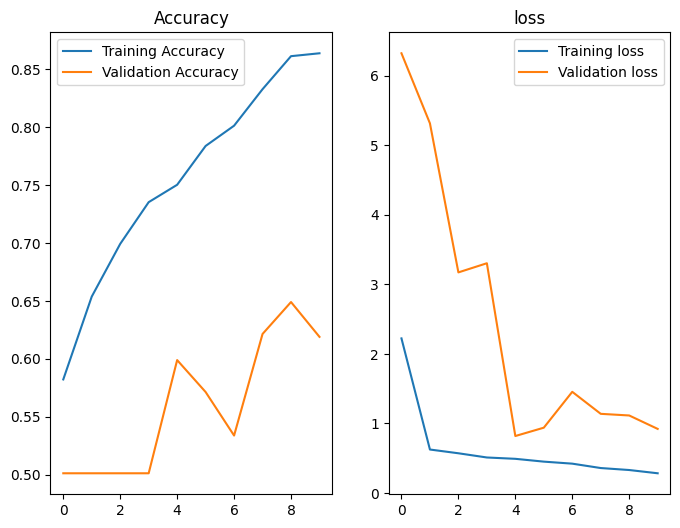

In [73]:
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],     label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')


plt.subplot(1,2,2)
plt.plot(history.history['loss'],     label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.title('loss')

plt.show()

### **OBSERVATIONS:**

1. Here we are plotting the training and Validation Accuracy and loss to understand the behaviour of the model and detect overfitting or underfitting.

### Step 14:  Visualize predictions

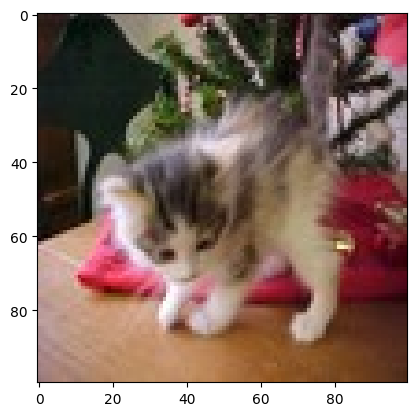

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Our model says it is a : dog


In [74]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)


### **OBSERVATIONS:**

1. The predicted image obtained is 'Cat' and it is same as the original image 'Cat'.

2. The model is fine.